<a href="https://colab.research.google.com/github/Noreen999/PRODIGY_DS_TASK-02/blob/main/PRODIGY_DS_TASK_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 02

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')



In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#data clean

In [ ]:
# Handling missing values:
# Filling missing Ages with the median Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Dropping unnecessary columns (for this example, we're dropping 'embarked' and 'deck')
df.drop(['Embarked', 'SibSp'], axis=1, inplace=True)

# Display the first few rows after cleaning
print("\nFirst Few Rows after Cleaning:")
print(df.head())


First Few Rows after Cleaning:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  Parch  \
0                            Braund, Mr. Owen Harris    male  22.0      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      0   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      0   
4                           Allen, Mr. William Henry    male  35.0      0   

             Ticket  
0         A/5 21171  
1          PC 17599  
2  STON/O2. 3101282  
3            113803  
4            373450  


#data exploration

## Distribution of survival

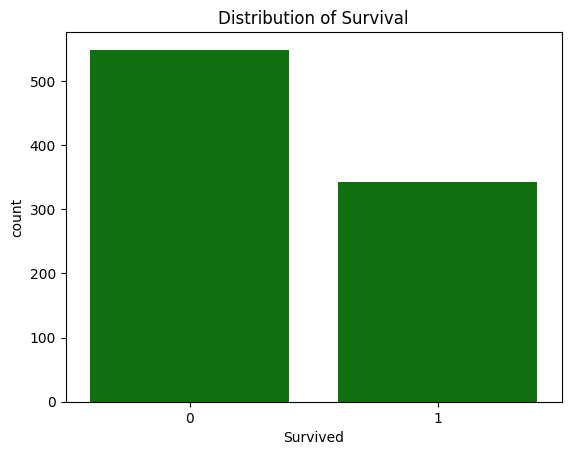

In [ ]:
# Explore relationships between variables


sns.countplot(x='Survived', data=df,color='g')
plt.title('Distribution of Survival')
plt.show()



## Survival rate by class

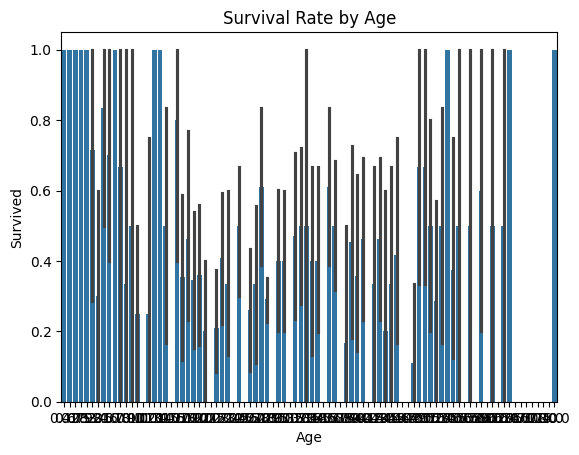

In [ ]:
# Survival rate by class
sns.barplot(x='Age', y='Survived', data=df)
plt.title('Survival Rate by Age')
plt.show()



## Survival rate by sex


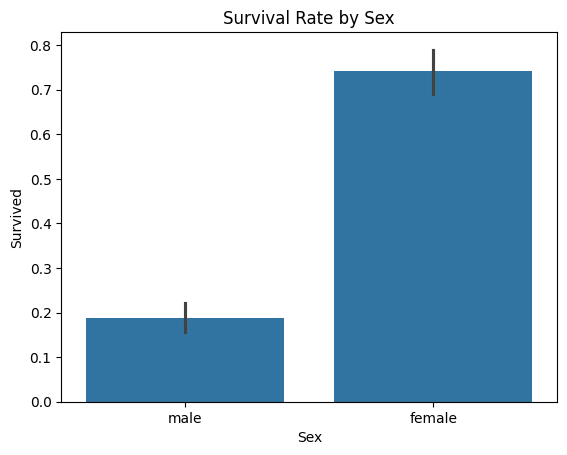

In [ ]:
# Survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()



## Age distribution

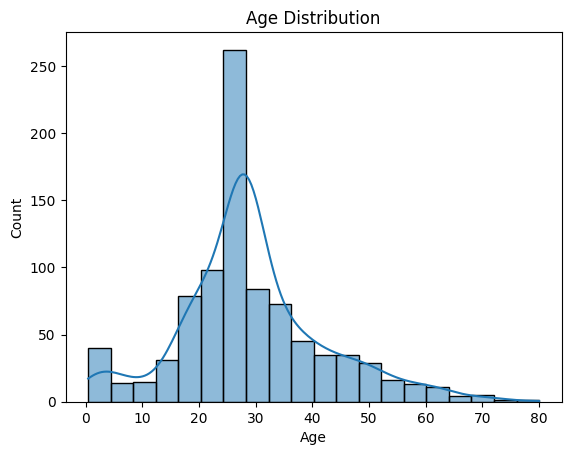

In [ ]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()



## Survival rate by age group

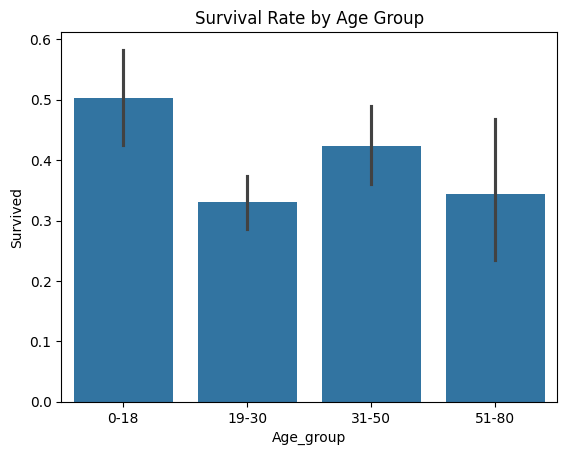

In [ ]:
# Survival rate by age group
df['Age_group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 80], labels=['0-18', '19-30', '31-50', '51-80'])
sns.barplot(x='Age_group', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()



## Correlation matrix

<ipython-input-28-78c738a06f37>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


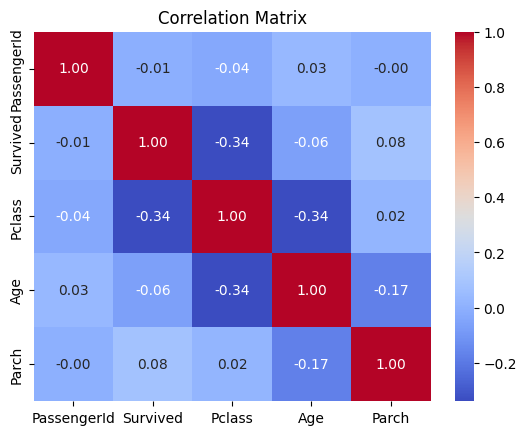

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#Great Job